<a href="https://colab.research.google.com/github/SK-Faizan-Nasir/CarEvaluationEDA/blob/main/CarEvaluation_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA On Car Evalutaion Dataset


# About the data:
from: https://archive.ics.uci.edu/ml/datasets/car+evaluation

Title: Car Evaluation Database

Sources:
(a) Creator: Marko Bohanec
(b) Donors: Marko Bohanec (marko.bohanec@ijs.si)
Blaz Zupan (blaz.zupan@ijs.si)
(c) Date: June, 1997

Past Usage:

The hierarchical decision model, from which this dataset is
derived, was first presented in

M. Bohanec and V. Rajkovic: Knowledge acquisition and explanation for
multi-attribute decision making. In 8th Intl Workshop on Expert
Systems and their Applications, Avignon, France. pages 59-78, 1988.

Within machine-learning, this dataset was used for the evaluation
of HINT (Hierarchy INduction Tool), which was proved to be able to
completely reconstruct the original hierarchical model. This,
together with a comparison with C4.5, is presented in

B. Zupan, M. Bohanec, I. Bratko, J. Demsar: Machine learning by
function decomposition. ICML-97, Nashville, TN. 1997 (to appear)

Relevant Information Paragraph:

Car Evaluation Database was derived from a simple hierarchical
decision model originally developed for the demonstration of DEX
(M. Bohanec, V. Rajkovic: Expert system for decision
making. Sistemica 1(1), pp. 145-157, 1990.). The model evaluates
cars according to the following concept structure:

CAR car acceptability
. PRICE overall price
. . buying buying price
. . maint price of the maintenance
. TECH technical characteristics
. . COMFORT comfort
. . . doors number of doors
. . . persons capacity in terms of persons to carry
. . . lug_boot the size of luggage boot
. . safety estimated safety of the car

Input attributes are printed in lowercase. Besides the target
concept (CAR), the model includes three intermediate concepts:
PRICE, TECH, COMFORT. Every concept is in the original model
related to its lower level descendants by a set of examples (for
these examples sets see http://www-ai.ijs.si/BlazZupan/car.html).

The Car Evaluation Database contains examples with the structural
information removed, i.e., directly relates CAR to the six input
attributes: buying, maint, doors, persons, lug_boot, safety.

Because of known underlying concept structure, this database may be
particularly useful for testing constructive induction and
structure discovery methods.

Number of Instances: 1728
(instances completely cover the attribute space)

Number of Attributes: 6

Attribute Values:

buying v-high, high, med, low
maint v-high, high, med, low
doors 2, 3, 4, 5-more
persons 2, 4, more
lug_boot small, med, big
safety low, med, high

Missing Attribute Values: none

Class Distribution (number of instances per class)

class N N[%]

In [ ]:
# import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
# to keep all plots in the notebook itself


In [ ]:
import warnings
warnings.filterwarnings('ignore')
# To ignore the warnings

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Projects/Car Evaluation/car_evaluation.csv")
#loading the dataset

In [ ]:
df.head()
#fetching the first 5 rows from the given data

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [ ]:
# changing column names according to the data 
df.columns = ["Price","Maintenance Cost","Number of Doors","Capacity","Size of Luggage Boot","safety","Decision"]
df.head() # fetching the first 5 rows

,Price,Maintenance Cost,Number of Doors,Capacity,Size of Luggage Boot,safety,Decision
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [ ]:
df.isnull().any()
#checking for null values

Price                   False
Maintenance Cost        False
Number of Doors         False
Capacity                False
Size of Luggage Boot    False
safety                  False
Decision                False
dtype: bool

In [ ]:
df.isna().sum()
#checking for missing data

Price                   0
Maintenance Cost        0
Number of Doors         0
Capacity                0
Size of Luggage Boot    0
safety                  0
Decision                0
dtype: int64

As observed there is no missing data so we can proceed with out data preprocessing and analysis

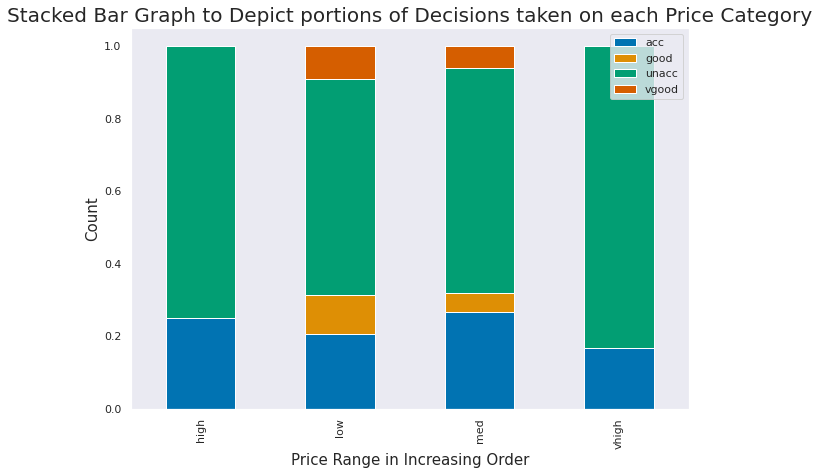

In [ ]:
# Bar graph to look into the portions on the price category
price = pd.crosstab(df['Price'], df['Decision'])
price.div(price.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (10, 7))

plt.title('Stacked Bar Graph to Depict portions of Decisions taken on each Price Category', fontsize = 20)
plt.xlabel('Price Range in Increasing Order', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.legend()
plt.show()

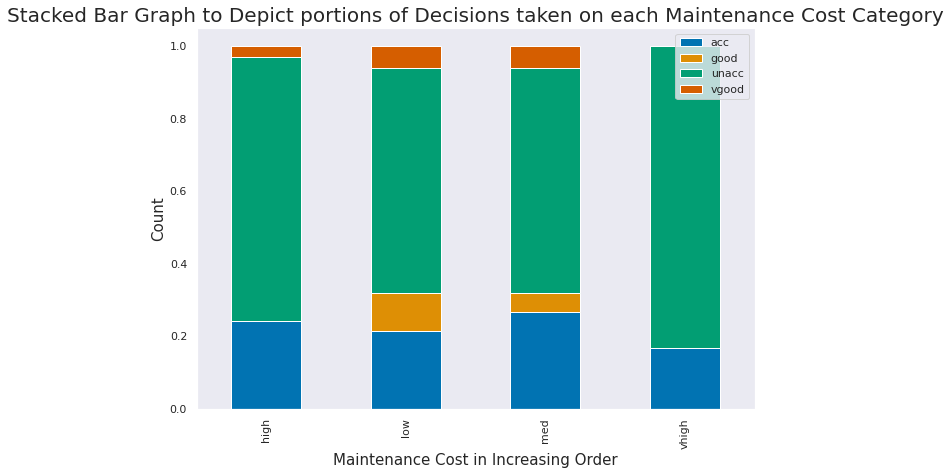

In [ ]:
# Bar graph to look into the portions on the maintenance cost

mc = pd.crosstab(df['Maintenance Cost'], df['Decision'])
mc.div(mc.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (10, 7))

plt.title('Stacked Bar Graph to Depict portions of Decisions taken on each Maintenance Cost Category', fontsize = 20)
plt.xlabel('Maintenance Cost in Increasing Order', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.legend()
plt.show()

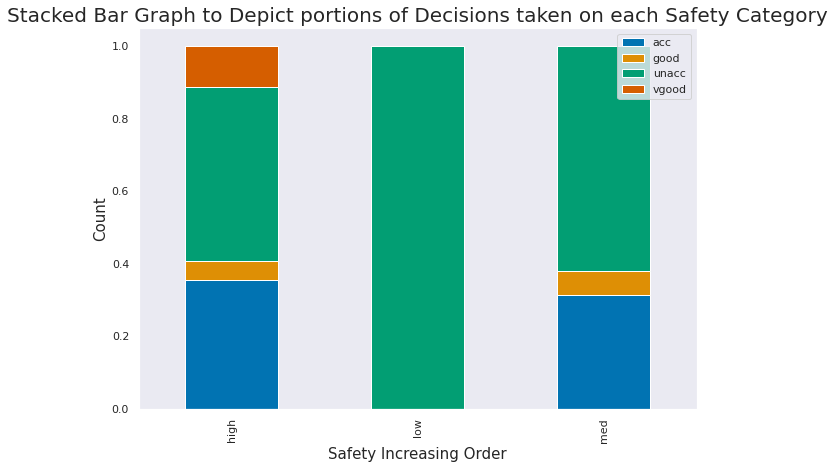

In [ ]:
# Bar graph to look into the portions on the safety

safety = pd.crosstab(df['safety'], df['Decision'])
safety.div(safety.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (10, 7))

plt.title('Stacked Bar Graph to Depict portions of Decisions taken on each Safety Category', fontsize = 20)
plt.xlabel('Safety Increasing Order', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.legend()
plt.show()

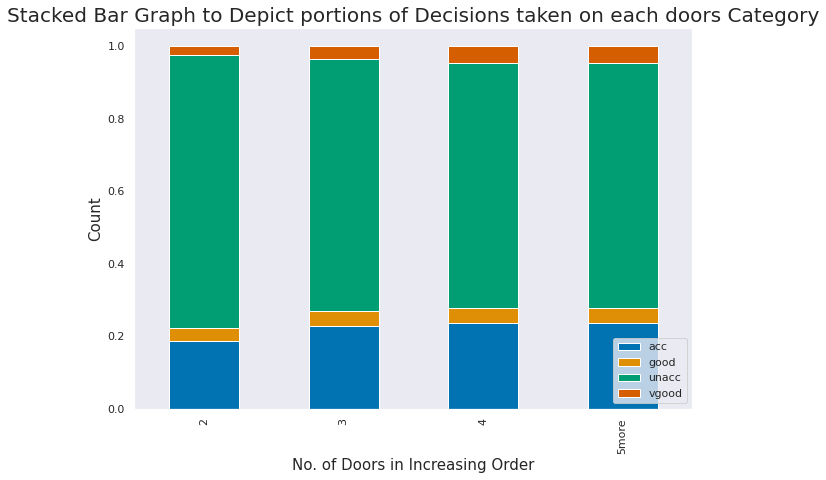

In [ ]:
# Bar graph to look into the portions on the Number of doors

doors = pd.crosstab(df['Number of Doors'], df['Decision'])
doors.div(doors.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (10, 7))

plt.title('Stacked Bar Graph to Depict portions of Decisions taken on each doors Category', fontsize = 20)
plt.xlabel('No. of Doors in Increasing Order', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.legend()
plt.show()

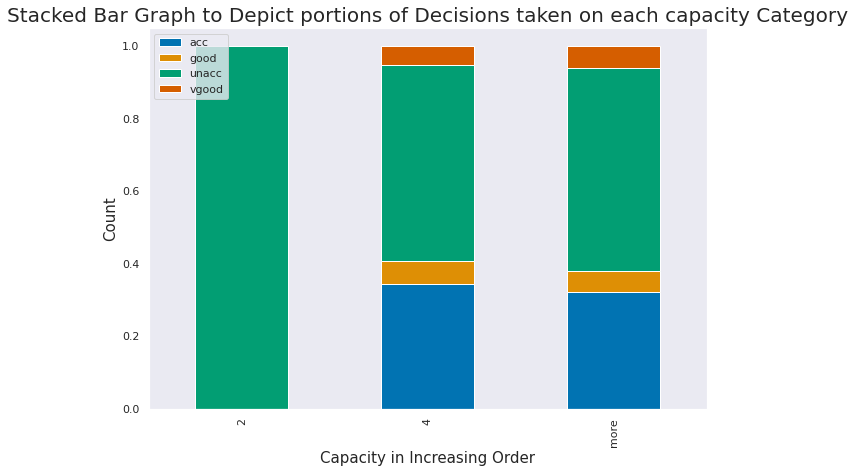

In [ ]:
# Bar graph to look into the portions on the Capacity
capacity = pd.crosstab(df['Capacity'], df['Decision'])
capacity.div(capacity.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (10, 7))

plt.title('Stacked Bar Graph to Depict portions of Decisions taken on each capacity Category', fontsize = 20)
plt.xlabel('Capacity in Increasing Order', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.legend()
plt.show()

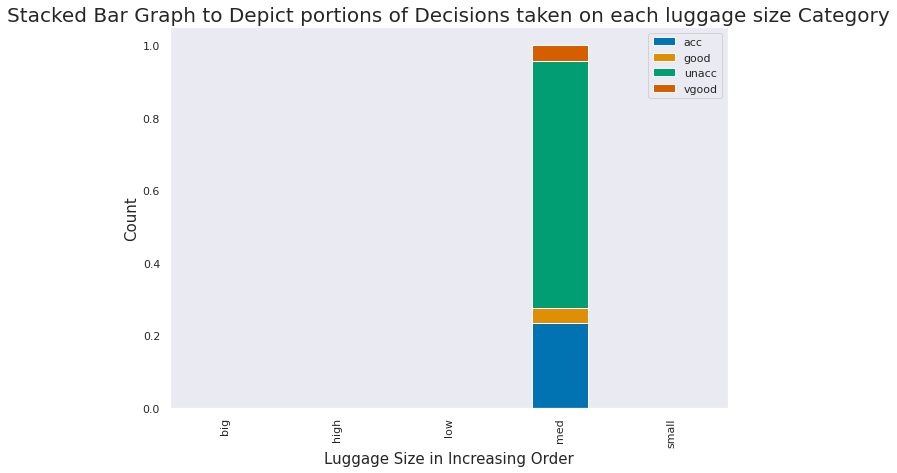

In [ ]:
# Bar graph to look into the portions on the Luggage Boot

luggage = pd.crosstab(df['Size of Luggage Boot'], df['Decision'])
luggage.div(safety.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (10, 7))

plt.title('Stacked Bar Graph to Depict portions of Decisions taken on each luggage size Category', fontsize = 20)
plt.xlabel('Luggage Size in Increasing Order', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.legend()
plt.show()

In [ ]:
df["Decision"].value_counts()

unacc    1209
acc       384
good       69
vgood      65
Name: Decision, dtype: int64

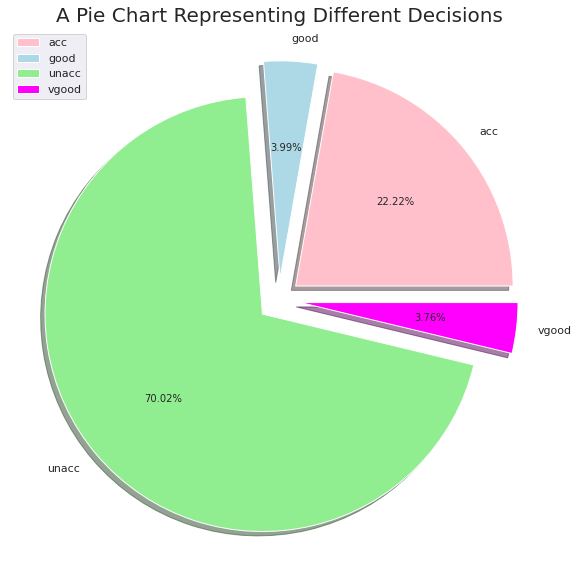

In [ ]:
# Pie Chart Division Based On Classes
labels = ['acc', 'good', 'unacc', 'vgood']
colors = ['pink', 'lightblue', 'lightgreen', 'magenta']
size = [384, 69, 1210, 65]
explode = [0.1, 0.1, 0.1, 0.1]

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, labels = labels, colors = colors, explode = explode, shadow = True, autopct = "%.2f%%")
plt.title('A Pie Chart Representing Different Decisions', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()


### Quick Description
#### Features:
Price: vhigh, high, med, low.<br>
Maintenance Cost: vhigh, high, med, low.<br>
Number of Doors: 2, 3, 4, 5more.<br>
Capacity: 2, 4, more.<br>
Size of Luggage Boot: small, med, big.<br>
safety: low, med, high.<br>
#### Target
Decision: unacc, acc, good, vgood.<br>

In [ ]:
df.describe(include="all")
# Applying Descriptive Statistics Upon The Given Data Including the Categorical Features 

,Price,Maintenance Cost,Number of Doors,Capacity,Size of Luggage Boot,safety,Decision
count,1727,1727,1727,1727,1727,1727,1727
unique,4,4,4,3,3,3,4
top,med,med,3,4,big,med,unacc
freq,432,432,432,576,576,576,1209


In [ ]:
df["Decision"].unique()

array(['unacc', 'acc', 'vgood', 'good'], dtype=object)

As observed there are a total of 4 unique class labels
Let's look at the countplot for the class labels


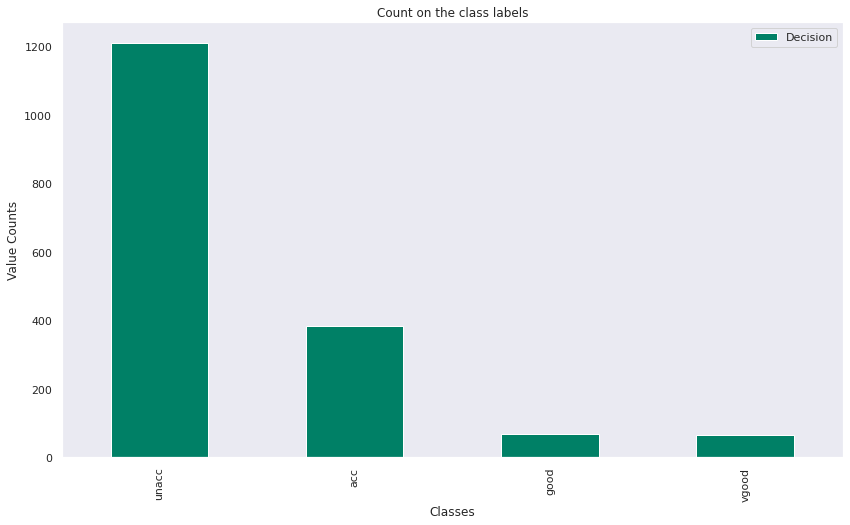

In [ ]:
plt.figure(figsize=(14,8)) # Specifying the size of the plot
plt.title("Count on the class labels")
df["Decision"].value_counts().plot(kind='bar',colormap="summer")
plt.xlabel("Classes")
plt.ylabel("Value Counts")
plt.legend()
plt.show()

As observed from the data,it seems to be imbalanced and might result in overfitting. So we need to upsample it to avoid that scenario

In [ ]:
df["Size of Luggage Boot"].value_counts()

big      576
med      576
small    575
Name: Size of Luggage Boot, dtype: int64

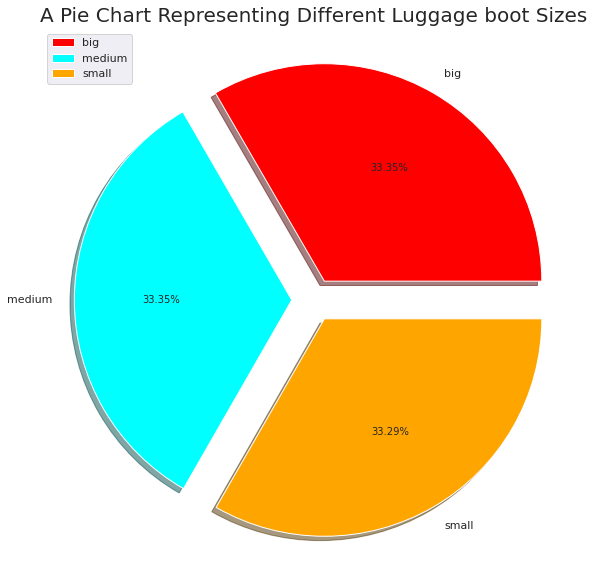

In [ ]:



labels = ['big', 'medium', 'small',]
colors = ['red', 'cyan', 'orange']
size = [576, 576, 575]
explode = [0.1, 0.1, 0.1]

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, labels = labels, colors = colors, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('A Pie Chart Representing Different Luggage boot Sizes', fontsize = 20)
plt.axis('off')
plt.legend()

plt.show()

In [ ]:
df["safety"].value_counts()

med     576
high    576
low     575
Name: safety, dtype: int64

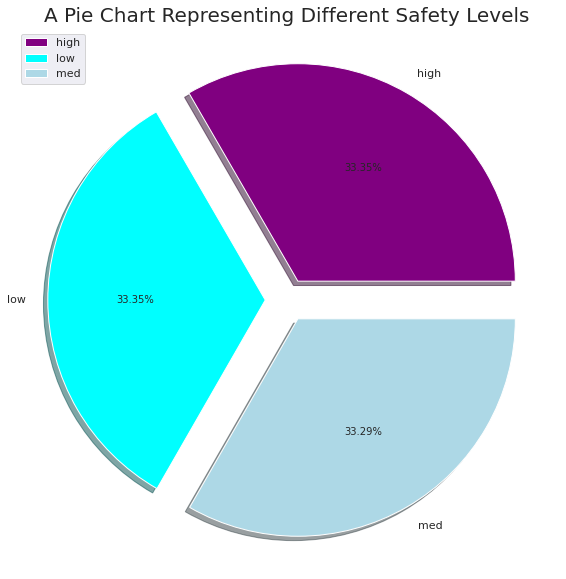

In [ ]:
labels = ['high', 'low', 'med']
colors = ['purple', 'cyan', 'lightblue']
size = [576, 576, 575]
explode = [0.1, 0.1, 0.1]

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, labels = labels, colors = colors, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('A Pie Chart Representing Different Safety Levels', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

In [ ]:
# Class count
class_count = df.Decision.value_counts()
# for oversampling getting the max count
max_class = max(class_count)

# Divide DataFrame by class
df_class_0 = df[df['Decision'] == "acc"]
df_class_1 = df[df['Decision'] == "good"]
df_class_2 = df[df['Decision'] == "unacc"]
df_class_3 = df[df['Decision'] == "vgood"]

#Oversampling
df_class_0_over = df_class_0.sample(max_class,replace = True)
df_class_1_over = df_class_1.sample(max_class,replace = True)
# df_class_2_over = df_class_2.sample(max_class) # not using maximum class
df_class_3_over = df_class_3.sample(max_class,replace = True)

data_os = pd.concat([df_class_0_over,df_class_1_over,df_class_3_over,df_class_2], axis = 0)
#Concatenation of dataset

In [ ]:
data_os["Decision"].value_counts() #unique values after over sampling

good     1209
vgood    1209
acc      1209
unacc    1209
Name: Decision, dtype: int64

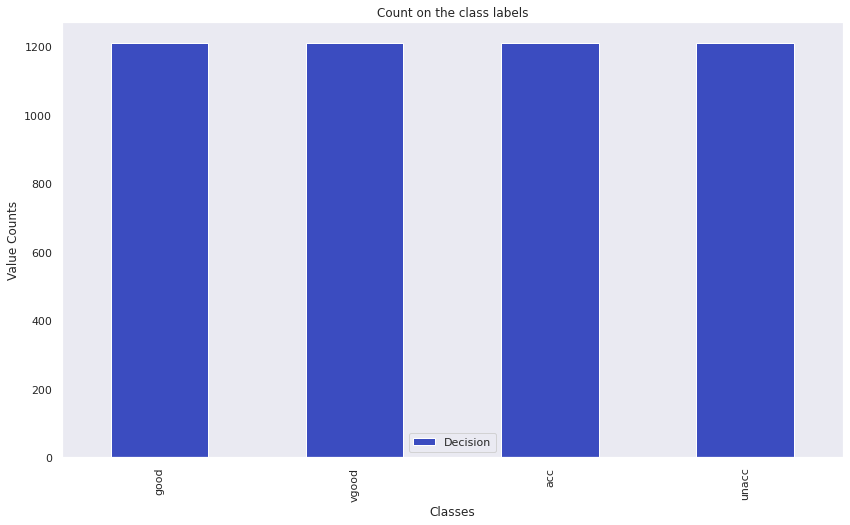

In [ ]:
# Count plot of decisions after oversampling
plt.figure(figsize=(14,8)) # Specifying the size of the plot
plt.title("Count on the class labels")
data_os["Decision"].value_counts().plot(kind='bar',colormap="coolwarm")
plt.xlabel("Classes")
plt.ylabel("Value Counts")
plt.legend()
plt.show()

As we can see clearly that all class labels are now equally lined up we can proceed further

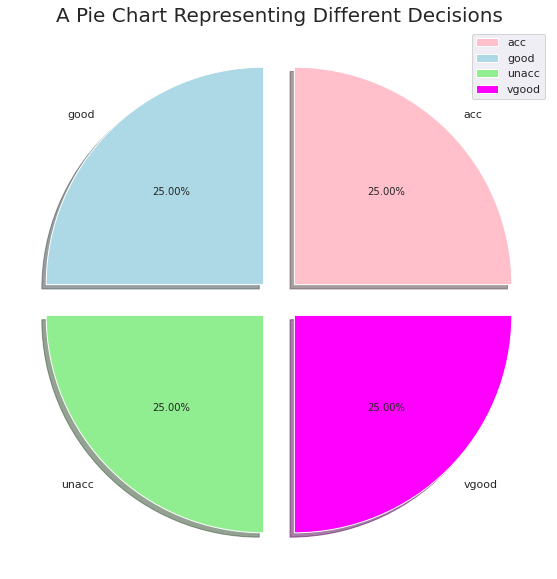

In [ ]:
# Pie Chart of Decisions after oversampling
df2['Decision'].reset_index()
labels = ['acc', 'good', 'unacc', 'vgood']
colors = ['pink', 'lightblue', 'lightgreen', 'magenta']
size = [1209, 1209, 1209, 1209]
explode = [0.1, 0.1, 0.1, 0.1]

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, labels = labels, colors = colors, explode = explode, shadow = True, autopct = "%.2f%%")
plt.title('A Pie Chart Representing Different Decisions', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

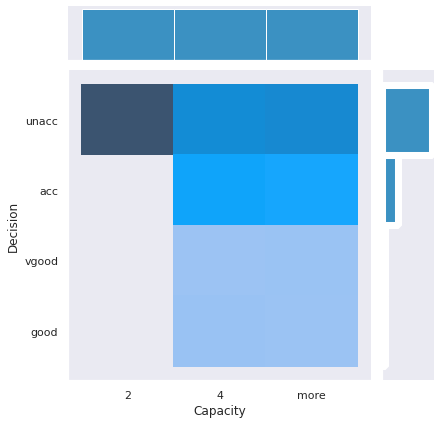

In [ ]:
sns.jointplot(x=df['Capacity'],y=df["Decision"],kind="hist") # Relation Between Capacity and Decision for uni and bi variate analysis

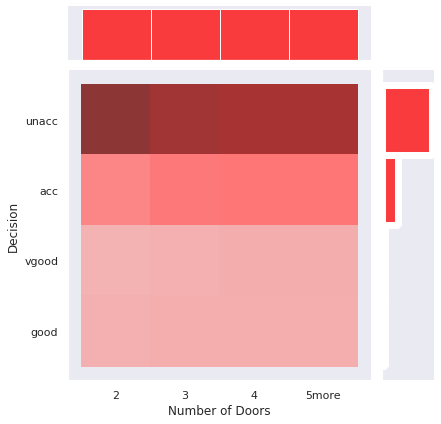

In [ ]:
sns.jointplot(x=df['Number of Doors'],y=df["Decision"],kind="hist",color="red")
# Relation Between Number Of Doors and Decision for uni and bi variate analysis

In [ ]:
df2=data_os # Storing data_os to df2

In [ ]:
df2["Number of Doors"].unique() # unique values in the column

array(['5more', '4', '2', '3'], dtype=object)

As we can see the Number of Doors are numerics but stored as strings
we need to clean the given data

In [ ]:
map_Number_of_Doors={'5more':5.0, '3':3.0, '2':2.0, '4':4.0} #creating a dict to replace values
df2["Number of Doors"]=df2["Number of Doors"].map(map_Number_of_Doors) # mapping changes to the column

In [ ]:
df2["Number of Doors"].unique() # unique values in the column

array([5., 4., 2., 3.])

We have changed the values of the Number of Doors to numerical feature

In [ ]:
df2["Number of Doors"]

1278    5.0
717     4.0
861     5.0
1039    4.0
957     5.0
       ... 
1712    5.0
1715    5.0
1718    5.0
1721    5.0
1724    5.0
Name: Number of Doors, Length: 4836, dtype: float64

In [ ]:
df["Capacity"].unique() # unique values in the column

array(['2', '4', 'more'], dtype=object)

For the Capacity column we can see the features given as 2 4 and more
as the value is more than 4 we will assign it to 5

In [ ]:
map_Capacity={'more':5.0,'2':2.0, '4':4.0} #creating a dict to replace values
df2["Capacity"]=df2["Capacity"].map(map_Capacity) # mapping changes to the column

In [ ]:
df2["Capacity"].unique() # unique values in the column

array([4., 5., 2.])

In [ ]:
df2

,Price,Maintenance Cost,Number of Doors,Capacity,Size of Luggage Boot,safety,Decision
1278,med,low,5.0,4.0,small,med,acc
717,high,med,4.0,4.0,big,med,acc
861,high,low,5.0,5.0,big,med,acc
1039,med,high,4.0,4.0,med,high,acc
957,med,vhigh,5.0,4.0,med,med,acc
...,...,...,...,...,...,...,...
1712,low,low,5.0,4.0,med,low,unacc
1715,low,low,5.0,4.0,big,low,unacc
1718,low,low,5.0,5.0,small,low,unacc
1721,low,low,5.0,5.0,med,low,unacc


There are multiple features with categorical values<br>
Let's now encode them all up to numeric values

In [ ]:
df2.columns #getting name of the columns

Index(['Price', 'Maintenance Cost', 'Number of Doors', 'Capacity',
       'Size of Luggage Boot', 'safety', 'Decision'],
      dtype='object')

As we can see categorical features are in the below columns:
['Price', 'Maintenance Cost','Size of Luggage Boot', 'safety', 'Decision']

In [ ]:
for i in ['Price', 'Maintenance Cost','Size of Luggage Boot', 'safety', 'Decision']: #looping each remaining column
  print("\n",i,":",df2[i].unique())  # unique values in the columns


 Price : ['med' 'high' 'low' 'vhigh']

 Maintenance Cost : ['low' 'med' 'high' 'vhigh']

 Size of Luggage Boot : ['small' 'big' 'med']

 safety : ['med' 'high' 'low']

 Decision : ['acc' 'good' 'vgood' 'unacc']


In [ ]:
maps={"low" : 1, "med":2,"high":3, "vhigh": 4} # As the three columns have same unique values we create this dict
df2["Price"]=df2["Price"].map(maps) # map the changes in all that apply
df2["Maintenance Cost"]=df2["Maintenance Cost"].map(maps)
df2["safety"]=df2["safety"].map(maps)
df2 # look at the changes

,Price,Maintenance Cost,Number of Doors,Capacity,Size of Luggage Boot,safety,Decision
1278,2,1,5.0,4.0,small,2,acc
717,3,2,4.0,4.0,big,2,acc
861,3,1,5.0,5.0,big,2,acc
1039,2,3,4.0,4.0,med,3,acc
957,2,4,5.0,4.0,med,2,acc
...,...,...,...,...,...,...,...
1712,1,1,5.0,4.0,med,1,unacc
1715,1,1,5.0,4.0,big,1,unacc
1718,1,1,5.0,5.0,small,1,unacc
1721,1,1,5.0,5.0,med,1,unacc


In [ ]:
maps2={"small" : 1, "med":2,"big":3} # dict to change the size of luggage boot
df2["Size of Luggage Boot"]=df2["Size of Luggage Boot"].map(maps2) # mapping the changes

In [ ]:
df2 # have a look at the data

,Price,Maintenance Cost,Number of Doors,Capacity,Size of Luggage Boot,safety,Decision
1278,2,1,5.0,4.0,1,2,acc
717,3,2,4.0,4.0,3,2,acc
861,3,1,5.0,5.0,3,2,acc
1039,2,3,4.0,4.0,2,3,acc
957,2,4,5.0,4.0,2,2,acc
...,...,...,...,...,...,...,...
1712,1,1,5.0,4.0,2,1,unacc
1715,1,1,5.0,4.0,3,1,unacc
1718,1,1,5.0,5.0,1,1,unacc
1721,1,1,5.0,5.0,2,1,unacc


We have converted all the features into numericals

In [ ]:
class_dict={'acc':1 ,'good':2 ,'vgood':3 ,'unacc':4} # dict to change the class labels
df2["Decision"]=df2["Decision"].map(class_dict) # Mapping the changes

In [ ]:
df2 # Look at the data

,Price,Maintenance Cost,Number of Doors,Capacity,Size of Luggage Boot,safety,Decision
1278,2,1,5.0,4.0,1,2,1
717,3,2,4.0,4.0,3,2,1
861,3,1,5.0,5.0,3,2,1
1039,2,3,4.0,4.0,2,3,1
957,2,4,5.0,4.0,2,2,1
...,...,...,...,...,...,...,...
1712,1,1,5.0,4.0,2,1,4
1715,1,1,5.0,4.0,3,1,4
1718,1,1,5.0,5.0,1,1,4
1721,1,1,5.0,5.0,2,1,4


The following data is completely cleaned

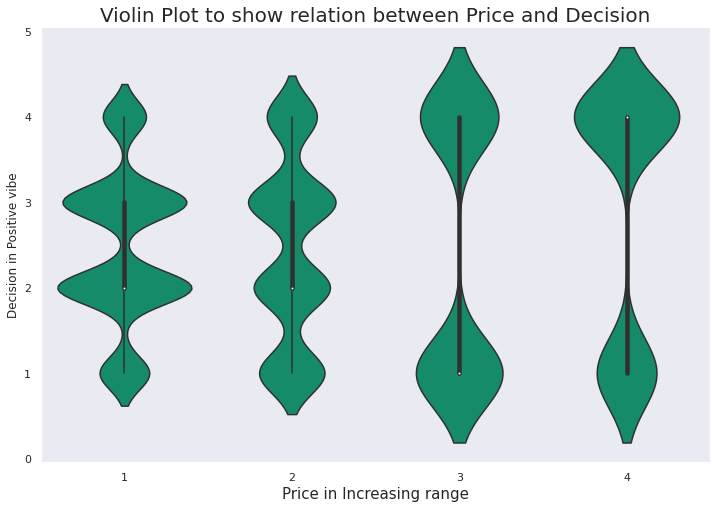

In [ ]:
# Violin Plot on the column and the Class Label to showcase the relation
plt.rcParams['figure.figsize'] = (12, 8)
ax = sns.violinplot(x = df2['Price'], y = df2['Decision'], color = 'g')
ax.set_title('Violin Plot to show relation between Price and Decision', fontsize = 20)
ax.set_xlabel('Price in Increasing range', fontsize = 15)
ax.set_ylabel('Decision in Positive vibe')
plt.show()

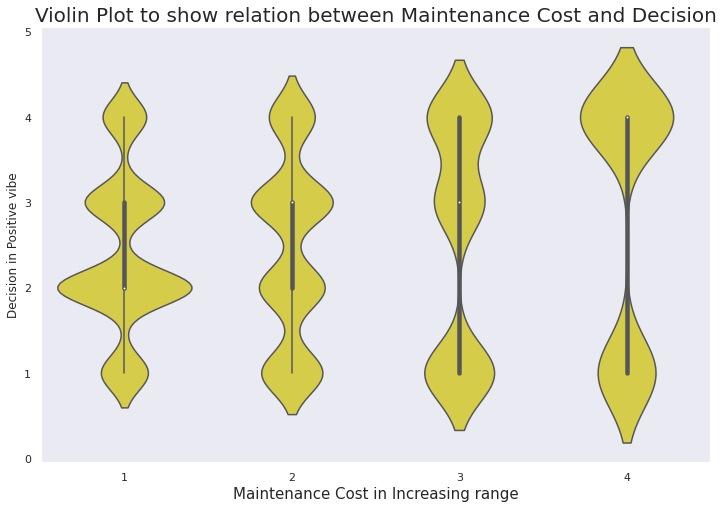

In [ ]:
# Violin Plot on the column and the Class Label to showcase the relation
sns.set(style = 'dark', palette = 'colorblind', color_codes = True)
plt.rcParams['figure.figsize'] = (12, 8)

ax = sns.violinplot(x = df2['Maintenance Cost'], y = df2['Decision'], color = 'y')
ax.set_title('Violin Plot to show relation between Maintenance Cost and Decision', fontsize = 20)
ax.set_xlabel('Maintenance Cost in Increasing range', fontsize = 15)
ax.set_ylabel('Decision in Positive vibe')
plt.show()

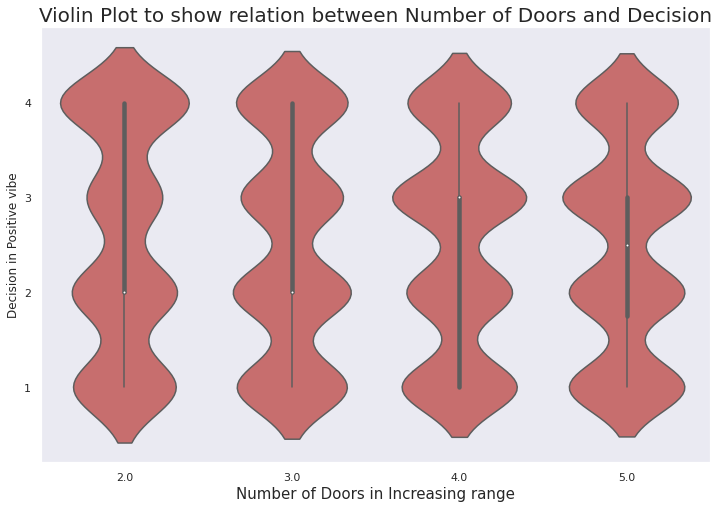

In [ ]:
# Violin Plot on the column and the Class Label to showcase the relation
sns.set(style = 'dark', palette = 'muted', color_codes = True)
plt.rcParams['figure.figsize'] = (12, 8)

ax = sns.violinplot(x = df2['Number of Doors'], y = df2['Decision'], color = 'r')
ax.set_title('Violin Plot to show relation between Number of Doors and Decision', fontsize = 20)
ax.set_xlabel('Number of Doors in Increasing range', fontsize = 15)
ax.set_ylabel('Decision in Positive vibe')
plt.show()

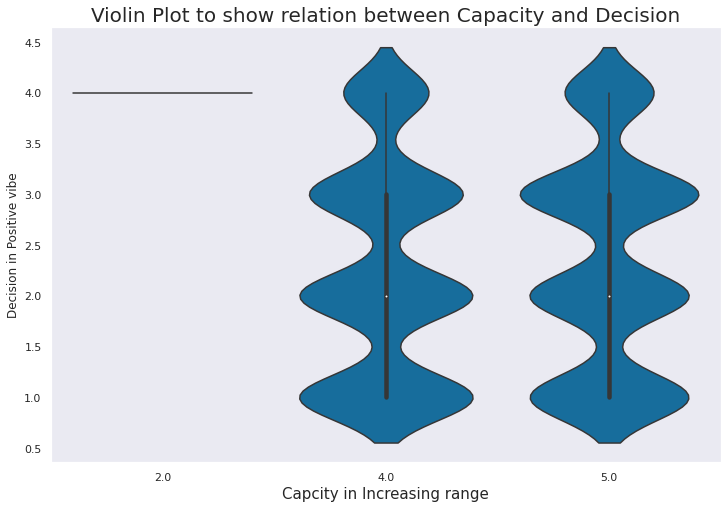

In [ ]:
# Violin Plot on the column and the Class Label to showcase the relation
sns.set(style = 'dark', palette = 'colorblind', color_codes = True)
plt.rcParams['figure.figsize'] = (12, 8)

ax = sns.violinplot(x = df2['Capacity'], y = df2['Decision'], color = 'b')
ax.set_title('Violin Plot to show relation between Capacity and Decision', fontsize = 20)
ax.set_xlabel('Capcity in Increasing range', fontsize = 15)
ax.set_ylabel('Decision in Positive vibe')
plt.show()

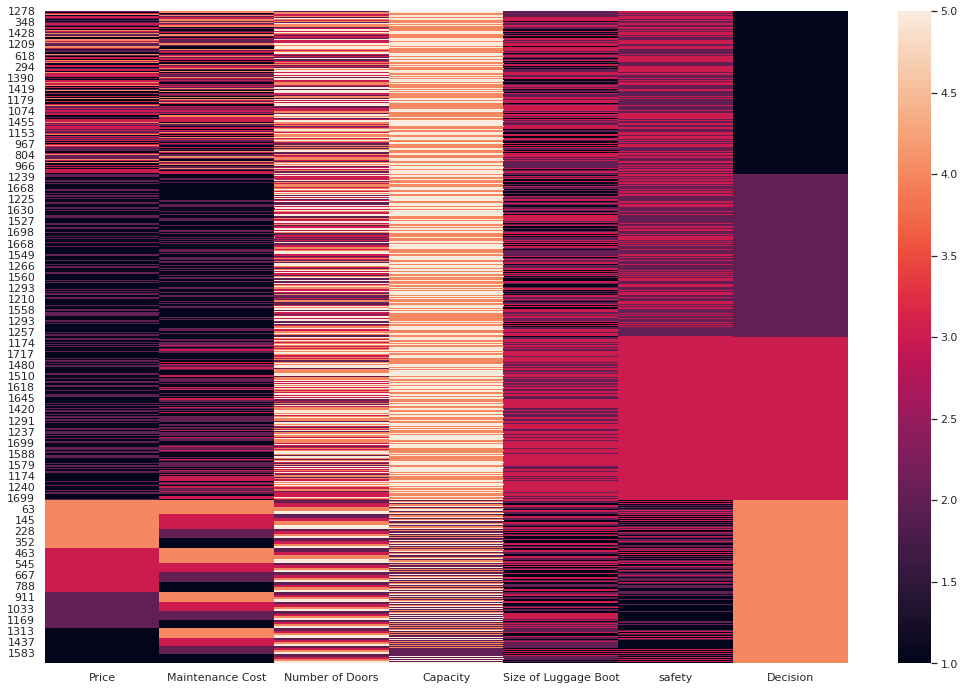

In [ ]:
plt.figure(figsize=(18,12))  # specifying the size
sns.heatmap(df2) # Plotting a heatmap to look at the value concentration


Text(0.5, 1.0, 'BoxPlot For Outlier Detection\nPrice vs Decision')

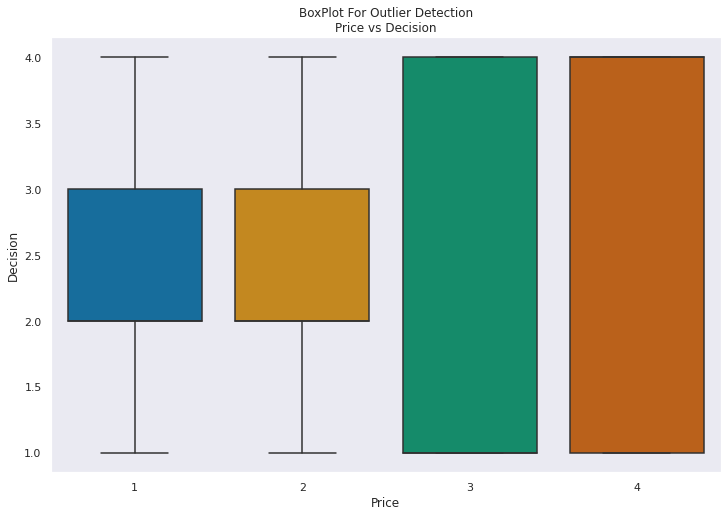

In [ ]:
# Implementing boxplots to check for an outlier
sns.boxplot(x=df2["Price"],y=df2["Decision"])
plt.title("BoxPlot For Outlier Detection\nPrice vs Decision")


Text(0.5, 1.0, 'BoxPlot For Outlier Detection\nMaintenance Cost vs Decision')

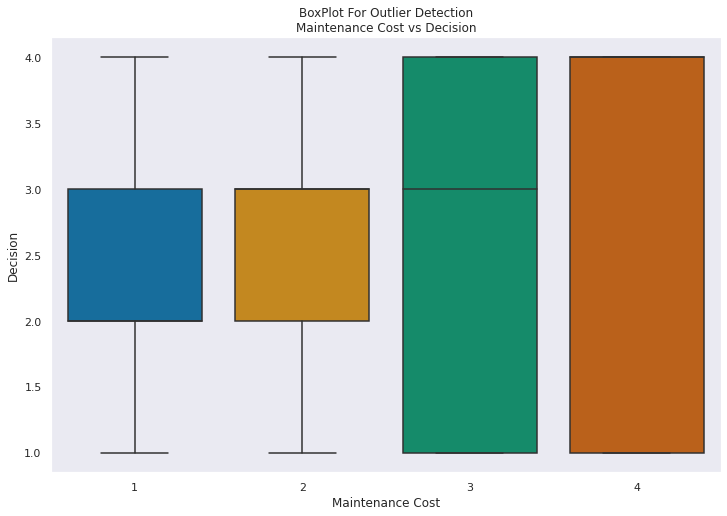

In [ ]:
# Implementing boxplots to check for an outlier

sns.boxplot(x=df2["Maintenance Cost"],y=df2["Decision"])
plt.title("BoxPlot For Outlier Detection\nMaintenance Cost vs Decision")

Text(0.5, 1.0, 'BoxPlot For Outlier Detection\nCapacity vs Decision')

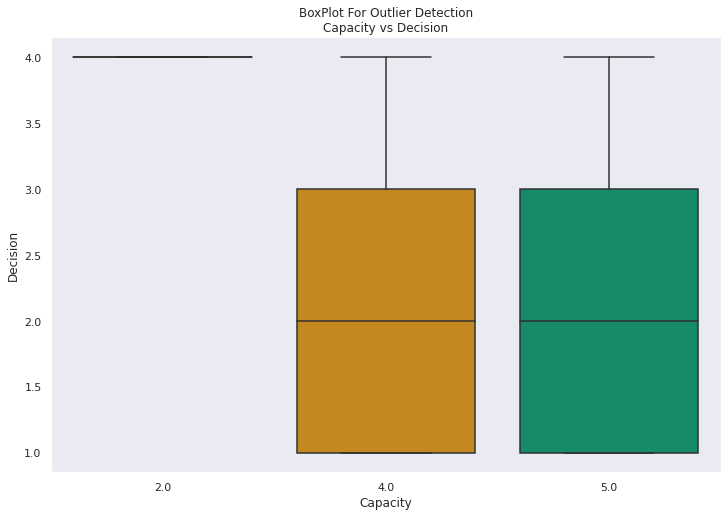

In [ ]:
# Implementing boxplots to check for an outlier

sns.boxplot(x=df2["Capacity"],y=df2["Decision"])
plt.title("BoxPlot For Outlier Detection\nCapacity vs Decision")

Text(0.5, 1.0, 'BoxPlot For Outlier Detection\nNumber of Doors vs Decision')

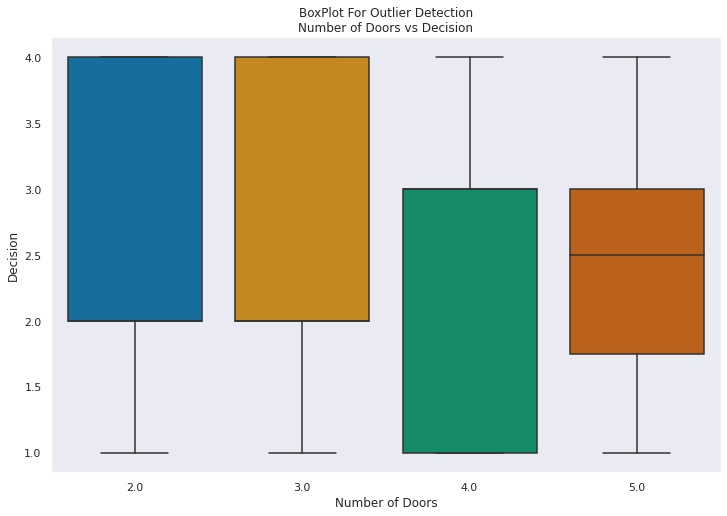

In [ ]:
# Implementing boxplots to check for an outlier

sns.boxplot(x=df2["Number of Doors"],y=df2["Decision"])
plt.title("BoxPlot For Outlier Detection\nNumber of Doors vs Decision")

Text(0.5, 1.0, 'BoxPlot For Outlier Detection\nSize of Luggage Boot vs Decision')

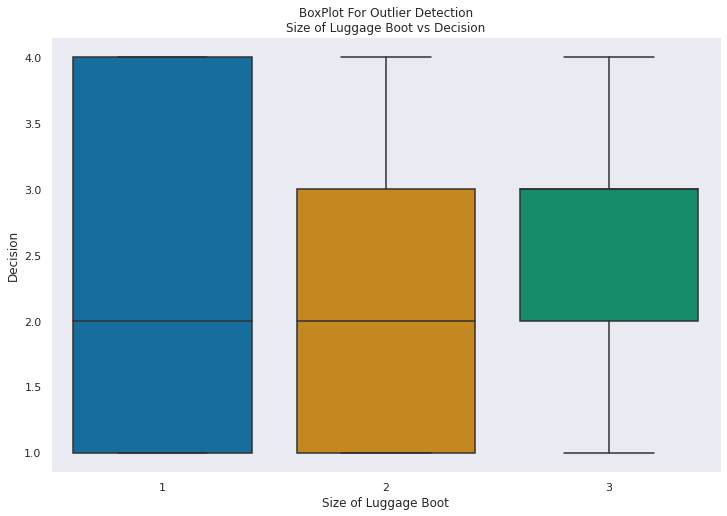

In [ ]:
# Implementing boxplots to check for an outlier

sns.boxplot(x=df2["Size of Luggage Boot"],y=df2["Decision"])
plt.title("BoxPlot For Outlier Detection\nSize of Luggage Boot vs Decision")

Since no outliers have been detected we are good to proceed

In [ ]:
df2.corr() # looking at the correlation of the data

,Price,Maintenance Cost,Number of Doors,Capacity,Size of Luggage Boot,safety,Decision
Price,1.000000,0.094727,-0.021842,-0.167783,-0.070450,-0.186539,0.091276
Maintenance Cost,0.094727,1.000000,-0.021034,-0.147166,-0.033884,-0.138983,0.124513
Number of Doors,-0.021842,-0.021034,1.000000,0.043830,-0.040429,0.003668,-0.024334
Capacity,-0.167783,-0.147166,0.043830,1.000000,0.090821,0.182906,-0.409240
Size of Luggage Boot,-0.070450,-0.033884,-0.040429,0.090821,1.000000,-0.003707,-0.002825
safety,-0.186539,-0.138983,0.003668,0.182906,-0.003707,1.000000,-0.265865
Decision,0.091276,0.124513,-0.024334,-0.409240,-0.002825,-0.265865,1.000000


In [ ]:
df2["car_type"]=df2["Capacity"]+df2["Number of Doors"] # adding the new column car type
df2 # looking at the data

,Price,Maintenance Cost,Number of Doors,Capacity,Size of Luggage Boot,safety,Decision,car_type
1278,2,1,5.0,4.0,1,2,1,9.0
717,3,2,4.0,4.0,3,2,1,8.0
861,3,1,5.0,5.0,3,2,1,10.0
1039,2,3,4.0,4.0,2,3,1,8.0
957,2,4,5.0,4.0,2,2,1,9.0
...,...,...,...,...,...,...,...,...
1712,1,1,5.0,4.0,2,1,4,9.0
1715,1,1,5.0,4.0,3,1,4,9.0
1718,1,1,5.0,5.0,1,1,4,10.0
1721,1,1,5.0,5.0,2,1,4,10.0


In [ ]:
df2['car_type'].unique() # unique car types

array([ 9.,  8., 10.,  7.,  6.,  4.,  5.])

The Cartype represents-
{4:"Coupe",5:"Coupe",6:"GT",7:"Sedan",8:"Hatchback",9:"SUV",10:"SUV"}

In [ ]:
df2 #have a look at the data

,Price,Maintenance Cost,Number of Doors,Capacity,Size of Luggage Boot,safety,Decision,car_type
1278,2,1,5.0,4.0,1,2,1,9.0
717,3,2,4.0,4.0,3,2,1,8.0
861,3,1,5.0,5.0,3,2,1,10.0
1039,2,3,4.0,4.0,2,3,1,8.0
957,2,4,5.0,4.0,2,2,1,9.0
...,...,...,...,...,...,...,...,...
1712,1,1,5.0,4.0,2,1,4,9.0
1715,1,1,5.0,4.0,3,1,4,9.0
1718,1,1,5.0,5.0,1,1,4,10.0
1721,1,1,5.0,5.0,2,1,4,10.0


In [ ]:
df2.dtypes #looking at all the data types

Price                     int64
Maintenance Cost          int64
Number of Doors         float64
Capacity                float64
Size of Luggage Boot      int64
safety                    int64
Decision                  int64
car_type                float64
dtype: object

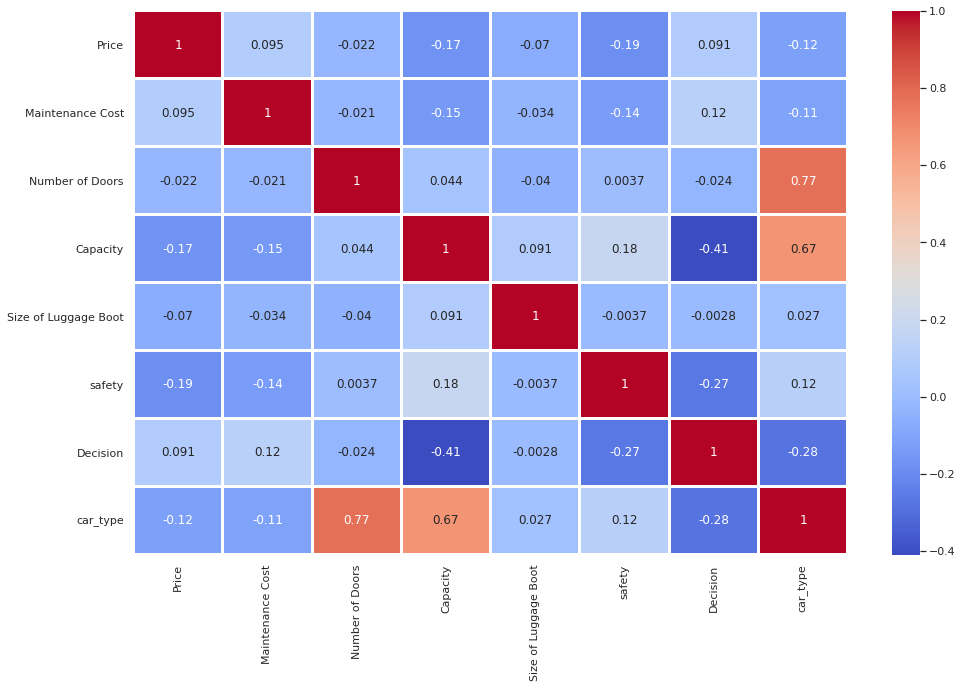

In [ ]:
plt.figure(figsize=(16,10)) # setting the figure size
sns.heatmap(df2.corr(),linewidths=2,cmap="coolwarm",annot=True)
# looking at the correlation heatmap

In [ ]:
X=df2.drop("Decision",axis=1) # All independent Features into X
Y=df2["Decision"] # the dependent feature into y

In [ ]:
from sklearn.preprocessing import MinMaxScaler
m=MinMaxScaler() # creating a MinMaxScaler object to scale down the data within the range of 0 and 1
X=m.fit_transform(X) # scaling and storing into x

In [ ]:
X #as we can see everythin is scaled down from 0-1

array([[0.33333333, 0.        , 1.        , ..., 0.        , 0.5       ,
        0.83333333],
       [0.66666667, 0.33333333, 0.66666667, ..., 1.        , 0.5       ,
        0.66666667],
       [0.66666667, 0.        , 1.        , ..., 1.        , 0.5       ,
        1.        ],
       ...,
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.        , 1.        , ..., 0.5       , 0.        ,
        1.        ],
       [0.        , 0.        , 1.        , ..., 1.        , 0.        ,
        1.        ]])

In [ ]:
Y # All the labels

1278    1
717     1
861     1
1039    1
957     1
       ..
1712    4
1715    4
1718    4
1721    4
1724    4
Name: Decision, Length: 4836, dtype: int64

In [ ]:
X.shape # Shape of X

(4836, 7)

In [ ]:
Y.shape # Shape Of Y

(4836,)

Hence, We have done the complete EDA and preprocessing on the data
It is clean and ready to be fed into a classification Algorithm.